##### A Convolutional Neural Network (CNN) is a specific type of artificial neural network that uses perceptrons/computer graphs, a machine learning unit algorithm used to analyze data. This data mainly involves images.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

### Organize data into train, validate, test directories
train: algorithms adjust their parameters
validate: algorithms check that their trained parameters can be generalized to data that the model has not seen before to avoid overfitting (optional step usually performed when the data is very big)
test: evaluate the performance of the model in real world data. This is the only phase which is without labels where the test data is given and the model predicts the class it belongs to and compare it with the true test labels.

In [2]:
os.chdir('E:/Machine Learning Washington University/projects/PetImages')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
  
for c in random.sample(glob.glob('c*'),500):
    shutil.move(c, 'train/cat')
for c in random.sample(glob.glob('d*'),500):
    shutil.move(c, 'train/dog')
for c in random.sample(glob.glob('c*'),100):
    shutil.move(c, 'valid/cat')
for c in random.sample(glob.glob('d*'),100):
    shutil.move(c, 'valid/dog')
for c in random.sample(glob.glob('c*'),50):
    shutil.move(c, 'test/cat')
for c in random.sample(glob.glob('d*'),50):
    shutil.move(c, 'test/dog')

    
os.chdir('../../')


#### glob(file_pattern, recursive = False)
It retrieves the list of files matching the specified pattern in the file_pattern parameter.

The file_pattern can be an absolute or relative path. It may also contain wild cards such as “*” or “?” symbols.

"*" for unspecified number of characters
"?" for specified number of characters

The recursive parameter is turn off (False) by default. When True, it recursively searches files under all subdirectories of the current directory.

In [2]:
#The set paths
train_path='E:/Machine Learning Washington University/projects/PetImages/train'
valid_path='E:/Machine Learning Washington University/projects/PetImages/valid'
test_path='E:/Machine Learning Washington University/projects/PetImages/test'

In [3]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
        .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
        .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
        .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat','dog'], batch_size=10, shuffle=False)
#preprocessing_function is a function that does some processing on the images before feeding them to the neural network
#target_size is the size of the target for each image where the image size can be reduced to 224*224 which contains the target only
# 224*224 is the image size used in vgg16 model always

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


#### ImageDataGenerator(preprocessing_function)
##### preprocessing_function: 
A function applied to each input. The function works after the image is resized and augmented. This function takes one argument: a single image (Numpy tensor with coefficient 3), and it should output a Numpy tensor of the same shape.
##### vgg16 is a deep CNN model. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes.
Channels: It is the depth of the image. e.g. RGB has 3 channels red, green, blue
Pooling: Pooling Layer is a layer of neural nodes in neural network that reduces the size of the input feature set. This is done by dividing the input feature set into many local neighbor areas, and then pooling one output value from each local neighbor area.


In a color image, we normally have 3 channels: red, green and blue; this way, a color image can be represented as a matrix of dimensions w×h×c, where c is the number of channels, that is, 3.
A convolution layer receives the image (w×h×c) as input where w is width and h is height, and generates as output an activation map of dimensions w′×h′×c′. The number of input channels in the convolution is c, while the number of output channels is c′. The filter for such a convolution is a tensor of dimensions f×f×c×c′, where f is the filter size (normally 3 or 5).

In [4]:
assert train_batches.n==1000
assert valid_batches.n==200
assert test_batches.n==100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2
#Checking that the number of image files and image classes is correct for each batch

In [5]:
imgs, labels = next(train_batches)
#The next() function returns the next item in an iterator.
#You can add a default return value as a second parameter, to return if the iterable has reached to its end.

In [22]:
#This function will plot images in the form of a grid with 1 row and 10 columns
def plot_images(images_arr):
    fig, axes = plt.subplots(1,10,figsize=(20,20))
    axes=axes.flatten() #Return a copy of the array collapsed into one dimension.
    #print("type of axes",type(axes))     # --> type of axes <class 'numpy.ndarray'>
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show() #Display all open figures.

subplots(nrows,ncols,**fig_kw)

**fig_kw: All additional keyword arguments are passed to the pyplot.figure call.

figsize: 2-tuple of floats, Figure dimension (width, height) in inches.

The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.

If the passed iterators have different lengths, the iterator with the least items decides the length of the new iterator.

matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)
Adjust the padding between and around subplots.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

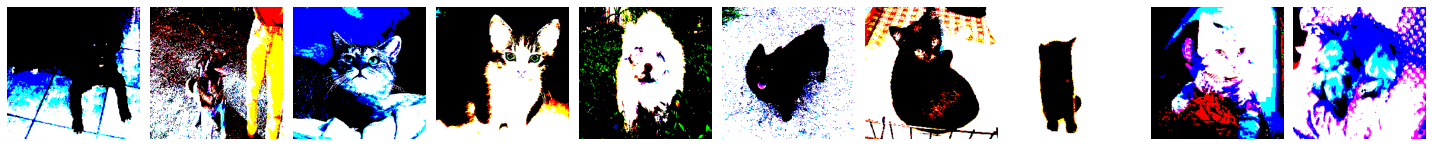

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [23]:
plot_images(imgs)
print(labels)

###### This is what the images look like after applying the preprocessing function
###### [1. 0.] for cat, [0. 1.] for dog

# Build and Train a CNN

In [25]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])


### Conv2D(filters,kernel_size,activation,padding,input_shape)
* filters:	The number of output filters in the convolution i.e., total feature maps
* kernel_size:	A tuple or integer value specifying the height and width of the 2D convolution window. (3,3) is the most common kernel_size
* activation:	Non-Linear functions [relu, softmax, sigmoid, tanh].
    The ReLU function is the Rectified linear unit. It is defined as: f(x)=max(0,x)
    Activation functions basically decide whether a neuron should be activated or not. Thus it bounds the value of the  net input. The activation function is a non-linear transformation that we do over the input before sending it to the next layer of neurons or finalizing it as output.
* padding:	“valid” means no padding. “same” means output has the same size as the input; because padding describes the addition of empty pixels around the edges of an image. The purpose of padding is to preserve the original size of an image when applying a convolutional filter and enable the filter to perform full convolutions on the edge pixels.
* input_shape: dimensions of the image that will be input to the network. input_shape(height, width, color_channel which is RGB)

### MaxPool2D(pool_size,strides)
Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.

The resulting output, when using the "valid" padding option (by default), has a spatial shape (number of rows or columns) of: output_shape = math.floor((input_shape - pool_size) / strides) + 1 (when input_shape >= pool_size)

Downsampling of 2D images is a technique employed in order to reduce the resolution of an input image. This is most helpful for reducing the storage size of images while preserving as much of their information as possible.

### Flatten()
flatten the dimensions of the image into one dimension. example: (None, 1, 10, 64) becomes (None, 640)

### Dense(units=2 which denotes cats and dogs, 'softmax' is an activation function which gives us probability for each corresponding output of the model)
Definition of the softmax function
https://deepai.org/machine-learning-glossary-and-terms/softmax-layer
It enssures that all the output probabilities sum to 1, and each output probability is between 0 and 1

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [27]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
    #Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function.
# The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
    # The cross-entropy of the distribution q relative to a distribution p over a given set is defined as follows:
        # H(p,q)=-Ep[log q]
# metrics: evaluation function which specifies the evaluation citeria

In [29]:
#There is a standalone validation_data parameter and we use it this time instead of split because we already splitted data into folders in the hard disk 
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)
#We don't need to specify y (data label) because it is already specified in x (train_batches) from the ImageDataGenerator function
# epochs = 10 means that the model will be training on the data 10 times until it is done training
#verbose allows us to see the output. 2 is the highest level of verbose which allows us to see the most detailed output

Epoch 1/10
100/100 - 50s - loss: 1.2737e-04 - accuracy: 1.0000 - val_loss: 2.3546 - val_accuracy: 0.7050 - 50s/epoch - 504ms/step
Epoch 2/10
100/100 - 49s - loss: 7.2887e-05 - accuracy: 1.0000 - val_loss: 2.3389 - val_accuracy: 0.7050 - 49s/epoch - 491ms/step
Epoch 3/10
100/100 - 51s - loss: 6.4480e-05 - accuracy: 1.0000 - val_loss: 2.3302 - val_accuracy: 0.7000 - 51s/epoch - 507ms/step
Epoch 4/10
100/100 - 51s - loss: 5.8838e-05 - accuracy: 1.0000 - val_loss: 2.3312 - val_accuracy: 0.7000 - 51s/epoch - 506ms/step
Epoch 5/10
100/100 - 50s - loss: 5.3955e-05 - accuracy: 1.0000 - val_loss: 2.3253 - val_accuracy: 0.7000 - 50s/epoch - 502ms/step
Epoch 6/10
100/100 - 55s - loss: 5.0074e-05 - accuracy: 1.0000 - val_loss: 2.3298 - val_accuracy: 0.7000 - 55s/epoch - 552ms/step
Epoch 7/10
100/100 - 50s - loss: 4.6558e-05 - accuracy: 1.0000 - val_loss: 2.3239 - val_accuracy: 0.7000 - 50s/epoch - 504ms/step
Epoch 8/10
100/100 - 50s - loss: 4.3950e-05 - accuracy: 1.0000 - val_loss: 2.3210 - val_ac

## Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

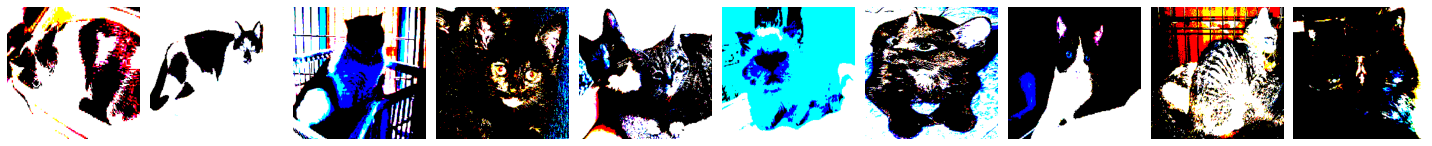

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [30]:
test_imgs, test_labels = next(test_batches)
plot_images(test_imgs)
print(test_labels)
#Note: We don't want to shuffle the test_imgs and test_labels because we will create a confusion matrix and compare the predicted data to the test data which is the true data

In [31]:
test_batches.classes #shows the class for every image in the test_batch
#0 corresponds to the 0th index which is cat and 1 corresponds to the 1st index which is a dog

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
predictions=model.predict(x=test_batches, verbose=0)

In [33]:
np.round(predictions)
#rounding the probability the image is a cat or a dog to the nearest integer

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

###### Creating confusion matrix

In [34]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))#i.e.axis=-1 last dimension axis which is 1 (The most inner dimension)
# argmax returns the index of the max element

In [45]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix
    Normalization can be applied by setting 'normalize=True'
    ^^^^^^^^ Search ^^^^^^^^
    """
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    
    print(cm)
    #print("type of cm is ",type(cm)) #type of cm is  <class 'numpy.ndarray'>
    thresh=cm.max()/2 #maximum value in the confusion matrix
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, cm[i,j], horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
        #print(type(cm[i,j]))   #<class 'numpy.int64'>
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

#### imshow(X,interpolation,cmap)
* X -> the image data. confusion matrix in our case.
* interpolation -> 'nearest' means nearest neighbor interpolation which is the simplest method, it just takes rounded value of the expected position and finds therefore the closest data value at integer position.
* cmap -> The Colormap instance or registered colormap name used to map scalar data to colors.
#### title(title of the confusion matrix)
#### colorbar()
Add a colorbar to a plot.
#### arange(int)
Return evenly spaced values within a given interval.
For integer arguments the function is equivalent to the Python built-in range function, but returns an ndarray rather than a list.
So in our case len(classes)=2 so it will return ndarray([0,1])
#### xticks(ticks,labels,**kwargs)
Get or set the current tick locations and labels of the x-axis.
ticks : array-like. The list of xtick locations.
labels : array-like. The labels to place at the given ticks locations.
**kwargs : Text properties can be used to control the appearance of the labels such as rotation, the rotation angle in degrees in mathematically positive direction (counterclockwise). 'horizontal' equals 0, 'vertical' equals 90.
#### yticks(ticks,labels)
Get or set the current tick locations and labels of the y-axis.
Same applies as x-axis
#### itertools.product()
itertools.product () is used to find the cartesian product from the given iterator, output is lexicographic ordered.
#### text(x,y,s,**kwargs)
Add text to the Axes.
x,y -> The place of the text
s -> the text
**kwargs -> test properties
color -> set the foreground color of the text

In [46]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix without normalization
[[31 19]
 [13 37]]


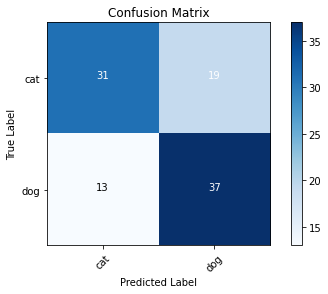

In [47]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')